<a href="https://colab.research.google.com/github/retnowm/MPG-Dataset-Analysis/blob/main/MPG_Dataset_Analysis_(Data_Visualization_and_EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization and EDA

## Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Import MPG dataset

Variables Description :

- MPG: mileage per gallon
- cylinders: number of cylinders
- displacement: piston stroke volume
- horsepower: engine power produced
- weight: the weight of the car
- acceleration: acceleration time from 0 to 60 km
- model_year : year of manufacture
- origin: the origin of the car
- name : car name

In [ ]:
mpg = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/tetris python/mpg.csv")
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


Pengamatan:
1. The dataset has 9 columns, with a size of 398 rows
2. 7 numeric columns, 2 categorical columns
3. There are missing values ​​in the horsepower column.

##Missing Value

In [ ]:
# Displays missing values
missing_values_horsepower = mpg[mpg["horsepower"].isnull()]
print(missing_values_horsepower)

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
32   25.0          4          98.0         NaN    2046          19.0   
126  21.0          6         200.0         NaN    2875          17.0   
330  40.9          4          85.0         NaN    1835          17.3   
336  23.6          4         140.0         NaN    2905          14.3   
354  34.5          4         100.0         NaN    2320          15.8   
374  23.0          4         151.0         NaN    3035          20.5   

     model_year  origin                  name  
32           71     usa            ford pinto  
126          74     usa         ford maverick  
330          80  europe  renault lecar deluxe  
336          80     usa    ford mustang cobra  
354          81  europe           renault 18i  
374          82     usa        amc concord dl  


<Axes: xlabel='horsepower'>

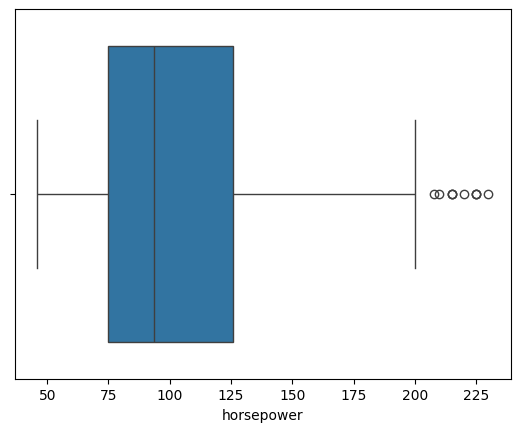

In [ ]:
# check for outliers in the horsepower variable
sns.boxplot(data=mpg, x="horsepower")
# There are outliers above Q3, therefore we will impute the middle value rather than the average value

In [ ]:
median_horsepower = mpg["horsepower"].median()
mpg["horsepower"].fillna(median_horsepower, inplace=True)
print(mpg)

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name  
0            70     usa  chevrolet chevelle malibu  
1            70     usa      

## EDA (Exploratory Data Analysis)

In [ ]:
numerik = ["mpg","cylinders","displacement","horsepower","weight","acceleration","model_year"]
kategorik = ["origin","name"]

In [ ]:
mpg[numerik].describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [ ]:
mpg[kategorik].describe()

,origin,name
count,398,398
unique,3,305
top,usa,ford pinto
freq,249,6


###Correlation

<ipython-input-12-16070d026557>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = mpg.corr()


<Axes: >

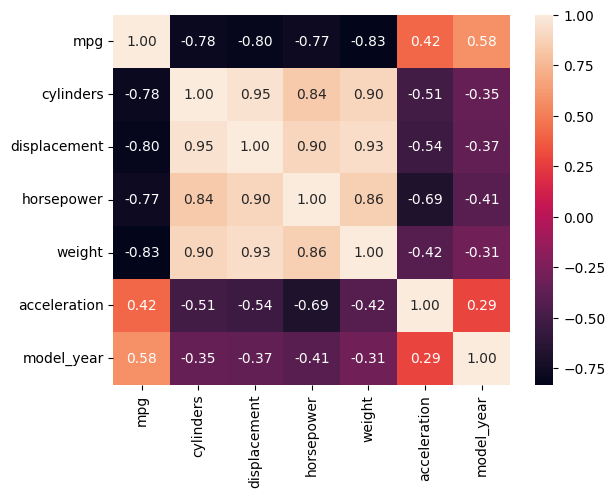

In [ ]:
correlation = mpg.corr()
sns.heatmap(correlation, annot=True, fmt=".2f")

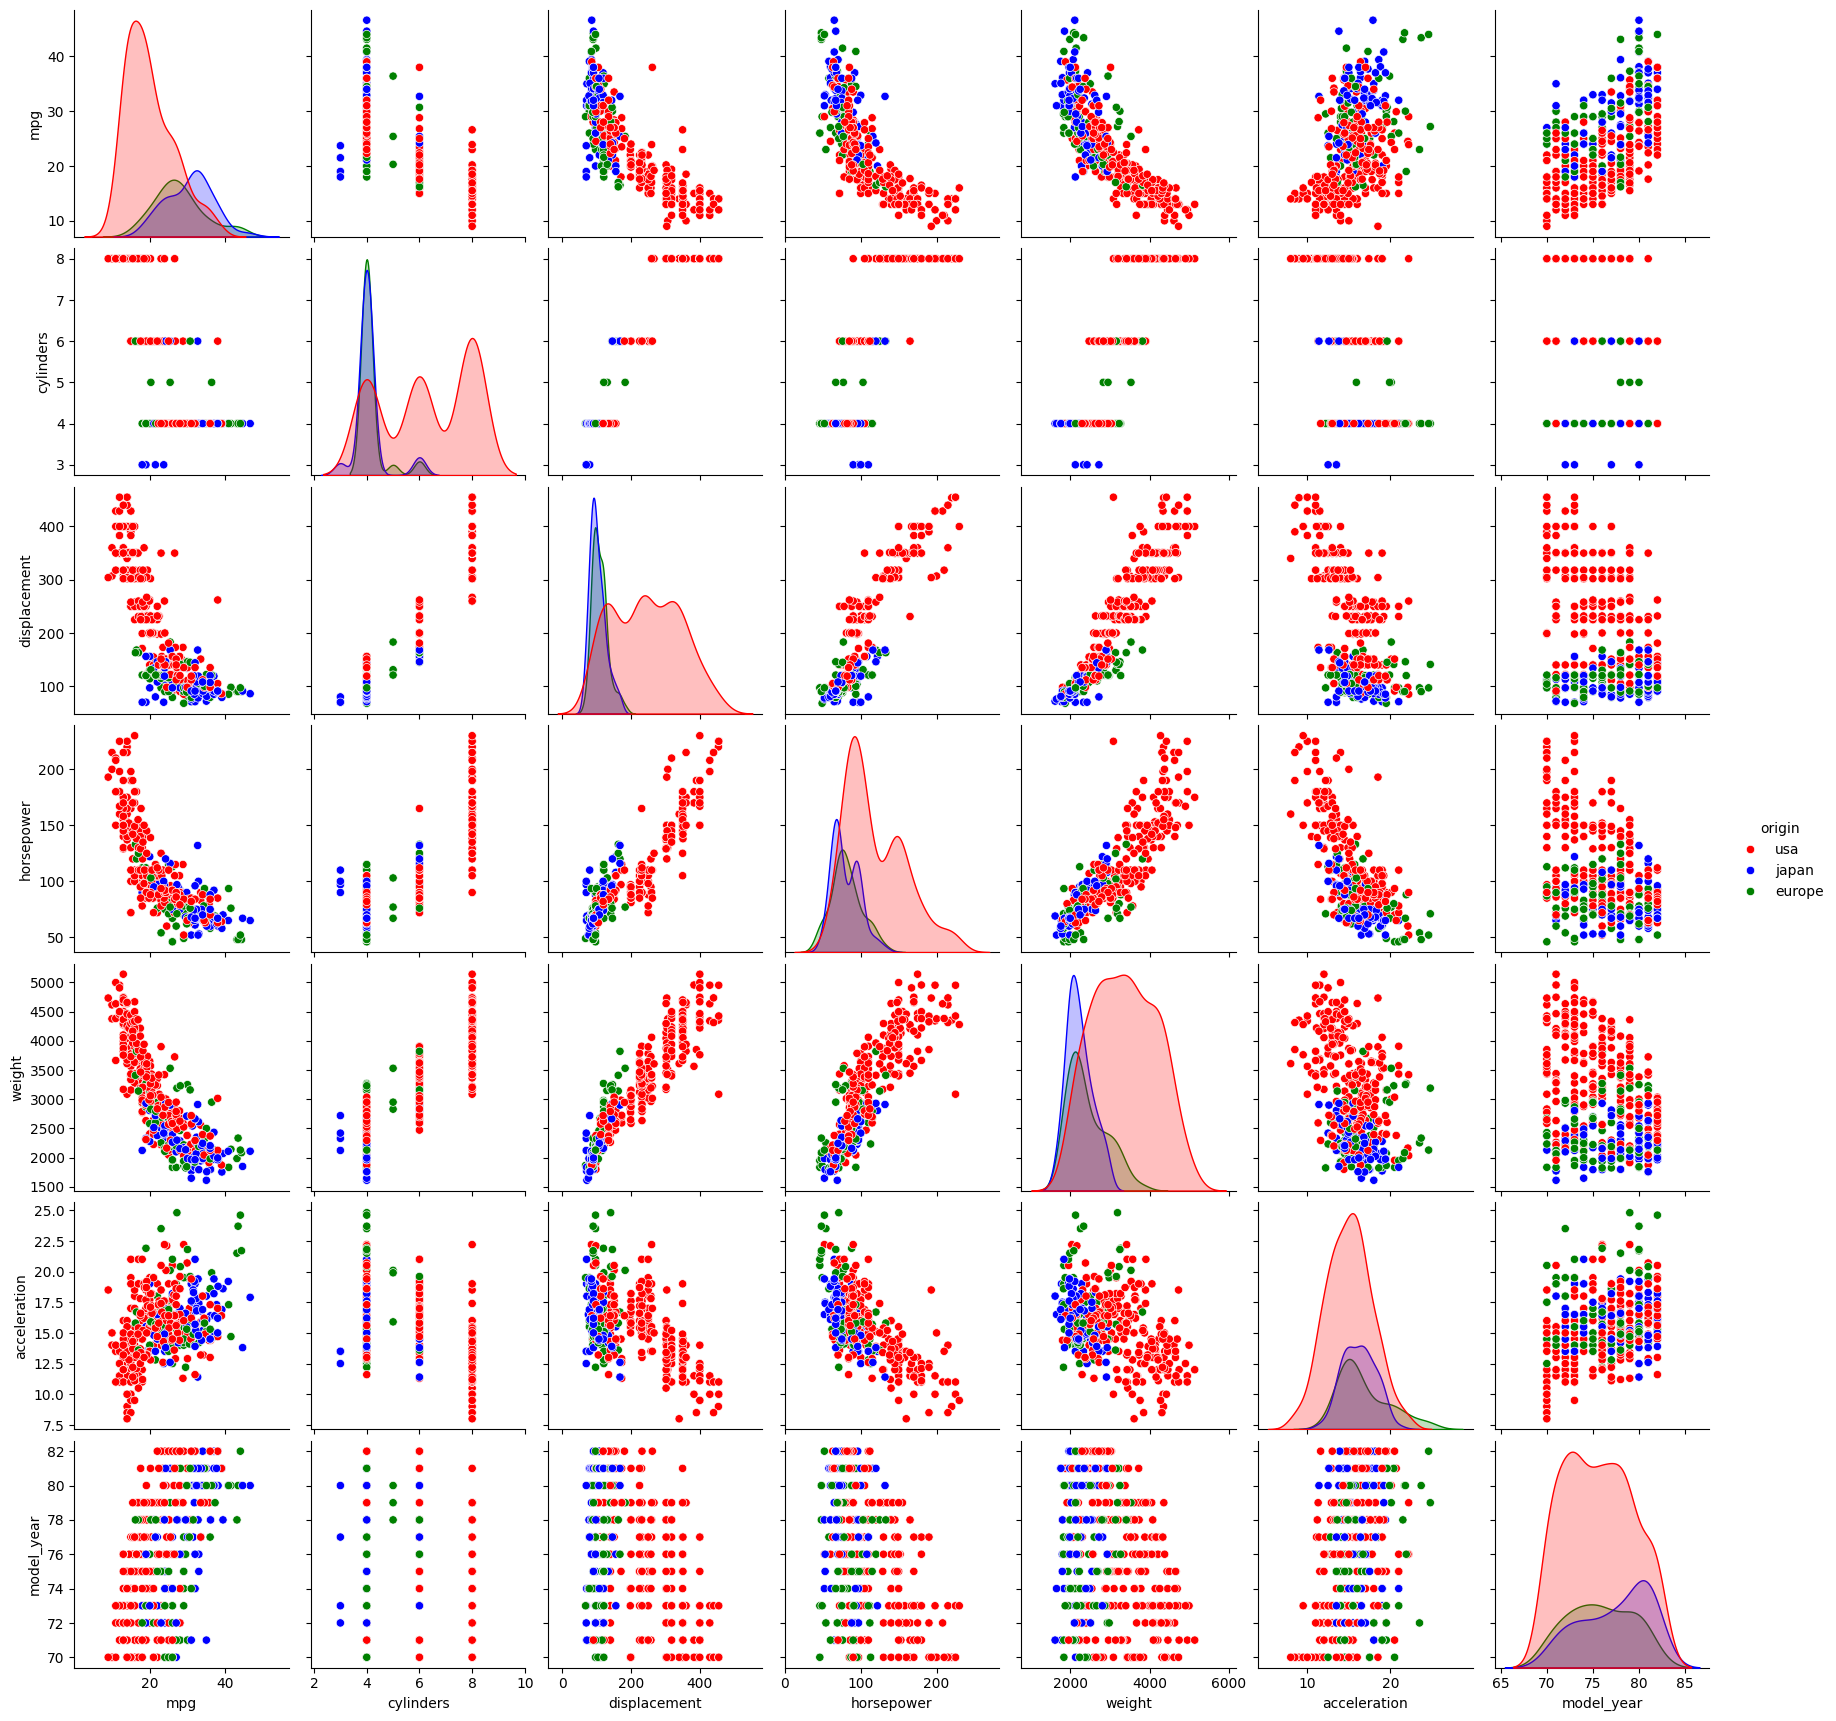

In [ ]:
sns.pairplot(mpg, diag_kind="kde", hue="origin", palette={"usa": "red", "japan": "blue", "europe": "green"})  # Gunakan diag_kind="hist" jika ingin histogram diagonal
plt.show()

Based on numerical data correlation, among others:
- Which is negatively correlated with mpg ie
1. weight
2. displacement
3. cylinders
4. horsepower
- Which is positively correlated >= 0.90 ie
1. displacement with weight and horsepower

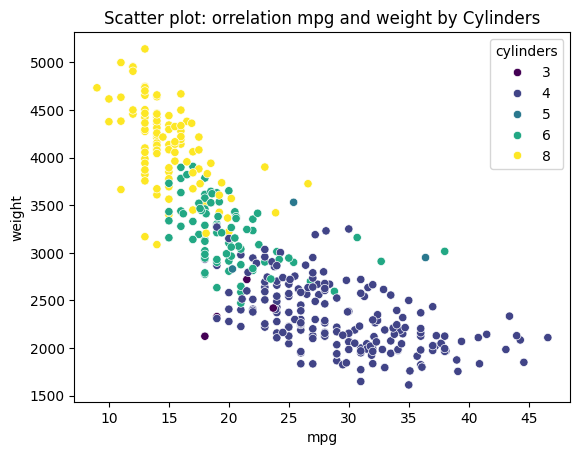

In [ ]:
# 1.1 Correlation mpg and weight by Cylinders
sns.scatterplot(x="mpg", y="weight", hue="cylinders", data=mpg, palette="viridis")
plt.title("Scatter plot: orrelation mpg and weight by Cylinders")
plt.show()

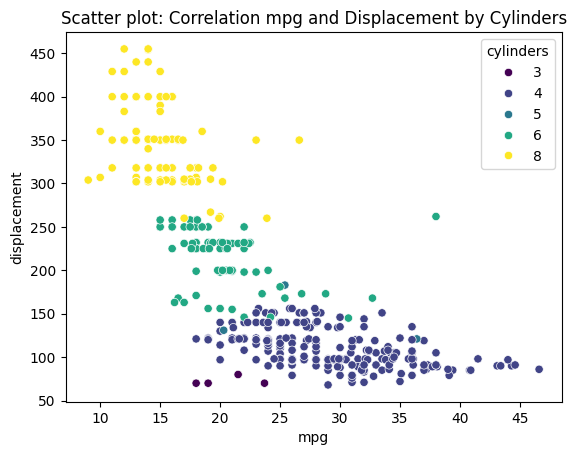

In [ ]:
# 1.2 Correlation mpg and Displacement by Cylinders
sns.scatterplot(x="mpg", y="displacement", hue="cylinders", data=mpg, palette="viridis")
plt.title("Scatter plot: Correlation mpg and Displacement by Cylinders")
plt.show()

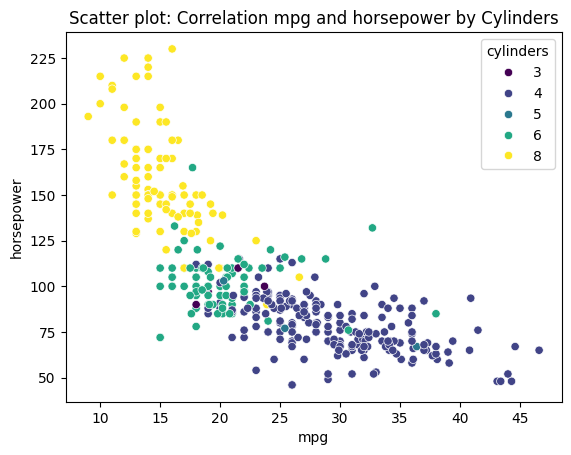

In [ ]:
# 1.3 Correlation mpg and horsepower by Cylinders
sns.scatterplot(x="mpg", y="horsepower", hue="cylinders", data=mpg, palette="viridis")
plt.title("Scatter plot: Correlation mpg and horsepower by Cylinders")
plt.show()

Conclusion :
- Weight, displacement and horsepower have the same correlation results with respect to MPG, that is, the higher the weight, displacement and horsepower, the lower the MPG or the car tends to be less efficient in fuel use, which is reflected in a decrease in the "MPG" value.
- Cars with a high number of cylinders tend to have low fuel efficiency (low MPG), and often cars with a high number of cylinders also have high weight, displacement and horsepower.

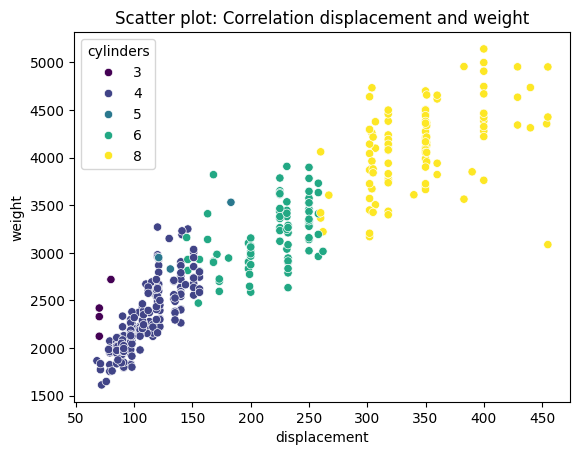

In [ ]:
#2.1.1 Correlation displacement and weight
sns.scatterplot(x="displacement", y="weight", hue="cylinders", data=mpg, palette="viridis")
#sns.scatterplot(data=tips, x="total_bill", y="tip")
plt.title("Scatter plot: Correlation displacement and weight")
plt.show()

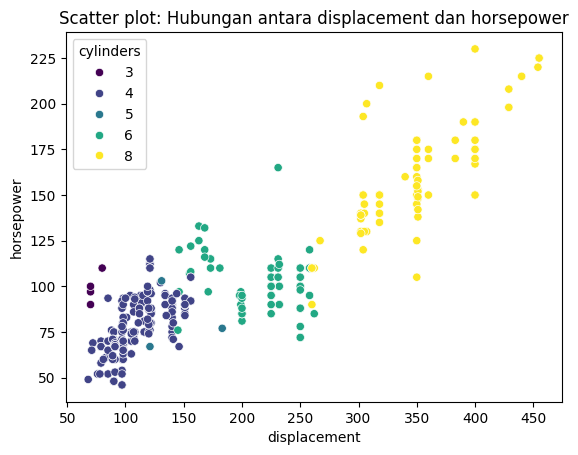

In [ ]:
#2.1.2 Correlation displacement and horsepower
sns.scatterplot(x="displacement", y="horsepower", hue="cylinders", data=mpg, palette="viridis")
plt.title("Scatter plot: Correlation displacement and horsepower")
plt.show()

Conclusion :
* The correlation between displacement and weight and horsepower has a positive relationship, namely the higher the displacement, the higher the weight and horsepower
1. Greater displacement often indicates a larger or more complex engine, which can result in an increase in vehicle weight.
2. Engines that have greater Displacement can usually burn more fuel and produce more power, which is reflected in a higher "horsepower" value.

###Analisis Berdasarkan Origin

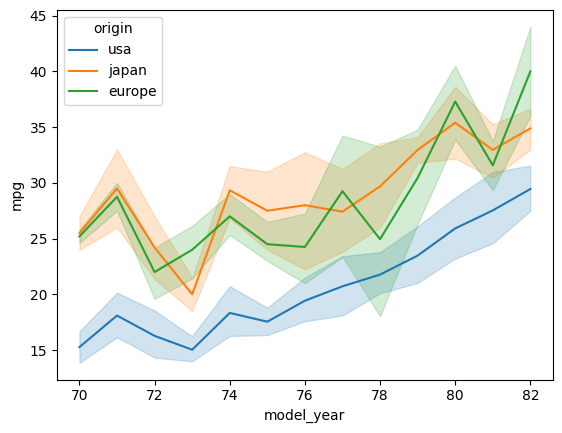

In [ ]:
sns.lineplot(data=mpg, x="model_year", y="mpg", hue="origin")
plt.xticks(rotation = 0)
plt.show()

<ipython-input-31-b71953d6f756>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=mpg, x='origin', palette="viridis")


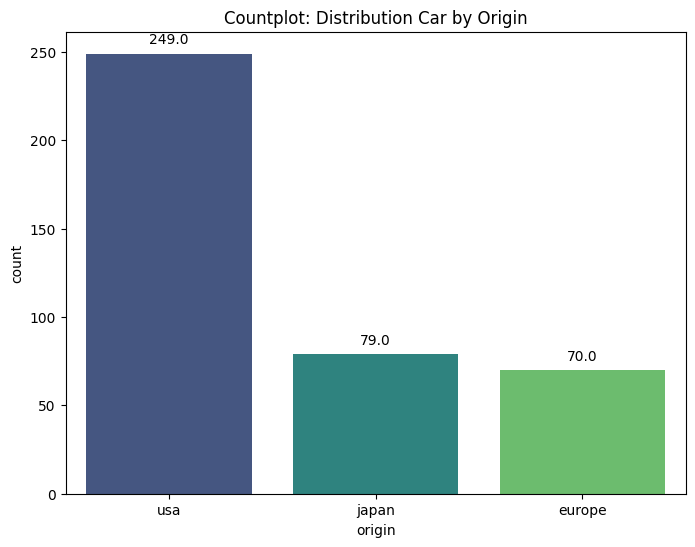

In [ ]:
# Create a countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=mpg, x='origin', palette="viridis")

# Add a number to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title("Countplot: Distribution Car by Origin")
plt.show()

<ipython-input-32-9a4a9237414d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="origin", y="mpg", data=mpg, palette="viridis")


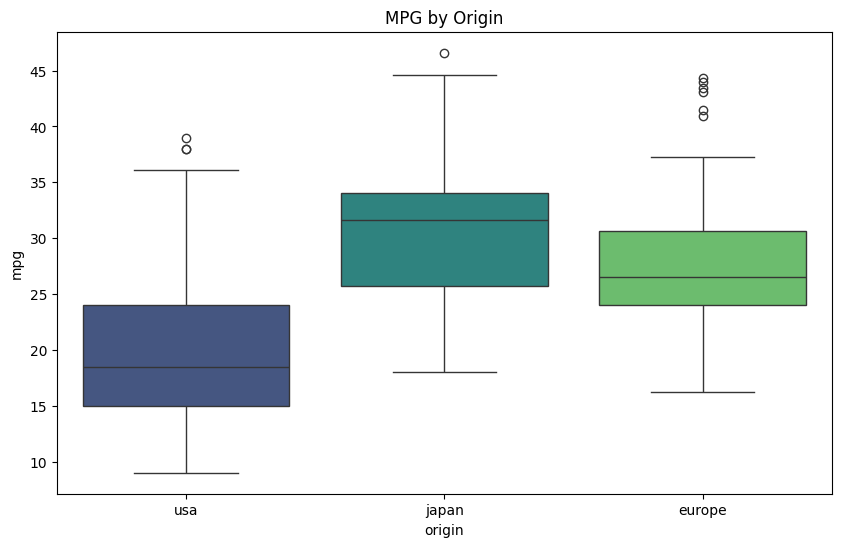

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="origin", y="mpg", data=mpg, palette="viridis")
plt.title("MPG by Origin")
plt.show()

<ipython-input-33-3549370e2760>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="origin", y="weight", data=mpg, palette="viridis")


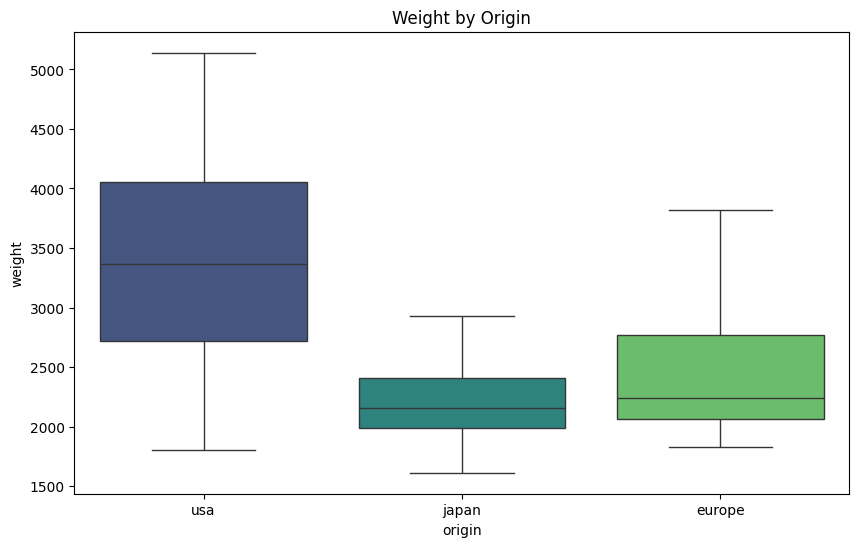

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="origin", y="weight", data=mpg, palette="viridis")
plt.title("Weight by Origin")
plt.show()

<ipython-input-35-2d606c55a574>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="model_year", y="acceleration", hue="origin", data=mpg, marker='o', ci=None)


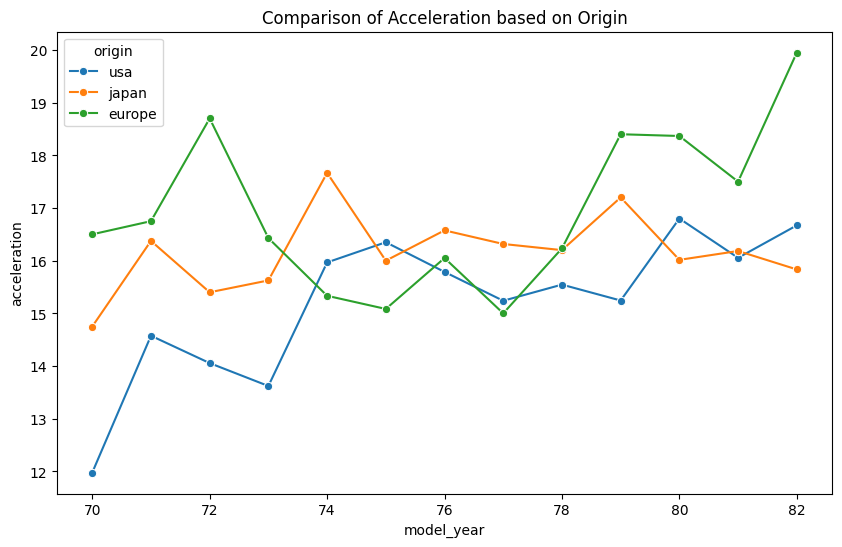

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="model_year", y="acceleration", hue="origin", data=mpg, marker='o', ci=None)
plt.title("Comparison of Acceleration based on Origin")
plt.show()

1. The largest number of cars comes from the USA (249) followed by Japan (79) and Europe (70)
2. Based on the model year, cars from the USA have a lower MPG value than cars from Japan and Europe
3. That cars from the USA tend to have lower fuel efficiency than Japan and Europe. In other words, cars from Japan and Europe have higher average "mpg", indicating better fuel efficiency.
4. It can be seen from the comparison of weight and MPG for each origin, the USA has a heavier weight, followed by Europe and finally Japan. This can affect fuel efficiency (mpg), as heavier cars tend to require more energy to move, which can result in lower fuel efficiency.

###Analysis by Name

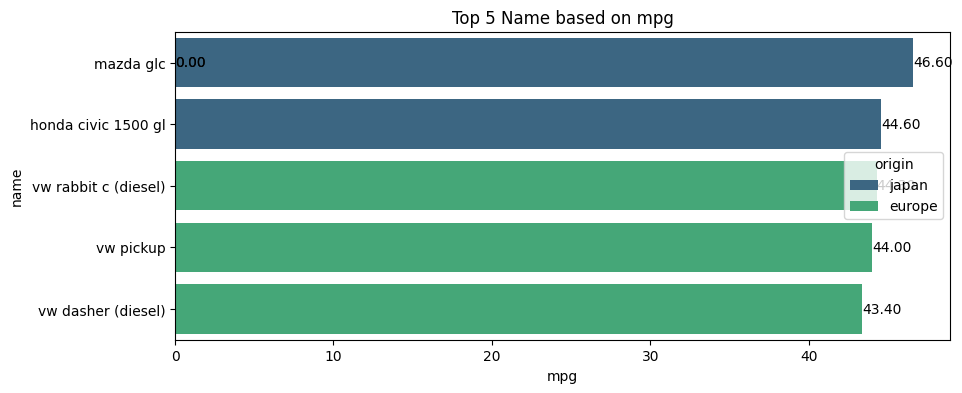

In [ ]:
# Displays the top 5 car names based on mpg
top5_acceleration = mpg.nlargest(5, 'mpg')

# Create a horizontal bar chart with Seaborn and add numbers
plt.figure(figsize=(10, 4))
ax = sns.barplot(x=top5_acceleration['mpg'], y=top5_acceleration['name'], hue=top5_acceleration['origin'], palette='viridis', orient='h')

# Add numbers to the diagram
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', (p.get_width(), p.get_y() + p.get_height()/2), ha='left', va='center')

plt.title("Top 5 Name based on mpg")
plt.show()

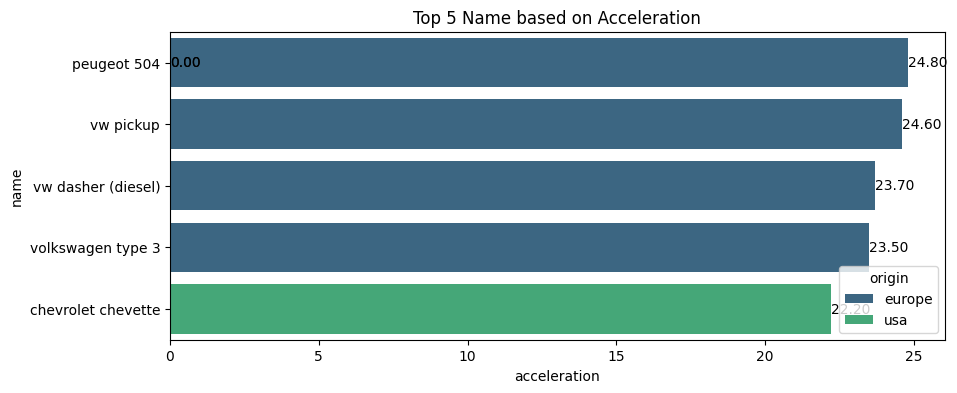

In [ ]:
# Displays the top 5 car names based on acceleration
top5_acceleration = mpg.nlargest(5, 'acceleration')

# Create a horizontal bar chart with Seaborn and add numbers
plt.figure(figsize=(10, 4))
ax = sns.barplot(x=top5_acceleration['acceleration'], y=top5_acceleration['name'], hue=top5_acceleration['origin'], palette='viridis', orient='h')

# Add numbers to the diagram
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', (p.get_width(), p.get_y() + p.get_height()/2), ha='left', va='center')

plt.title("Top 5 Name based on Acceleration")
plt.show()

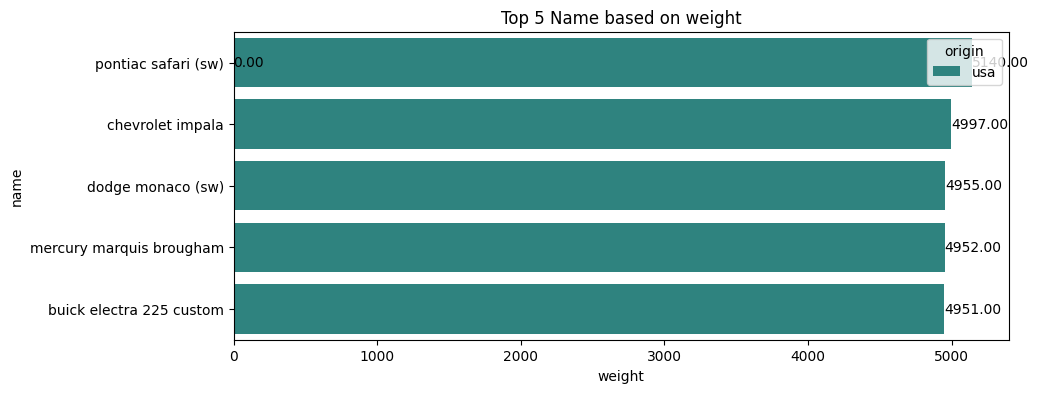

In [ ]:
# Displays the top 5 car names based on weight
top5_acceleration = mpg.nlargest(5, 'weight')

# Create a horizontal bar chart with Seaborn and add numbers
plt.figure(figsize=(10, 4))
ax = sns.barplot(x=top5_acceleration['weight'], y=top5_acceleration['name'], hue=top5_acceleration['origin'], palette='viridis', orient='h')

# Add numbers to the diagram
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', (p.get_width(), p.get_y() + p.get_height()/2), ha='left', va='center')

plt.title("Top 5 Name based on weight")
plt.show()

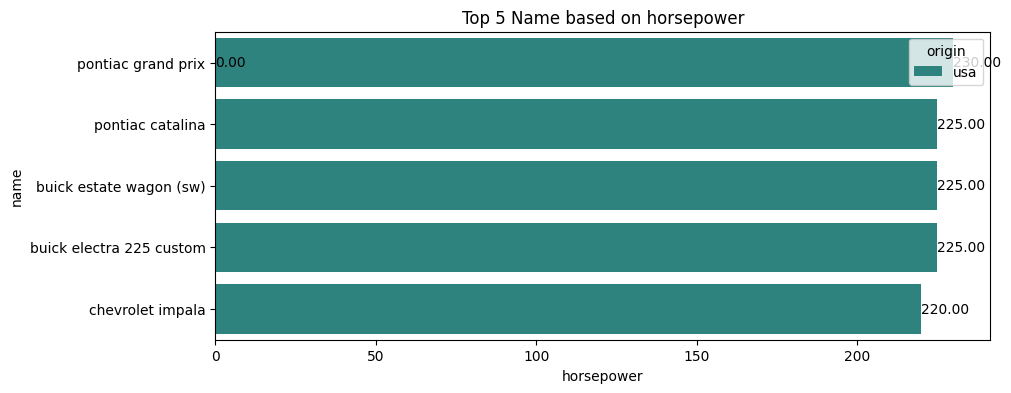

In [ ]:
# Displays the top 5 car names based on horsepower
top5_acceleration = mpg.nlargest(5, 'horsepower')

# Create a horizontal bar chart with Seaborn and add numbers
plt.figure(figsize=(10, 4))
ax = sns.barplot(x=top5_acceleration['horsepower'], y=top5_acceleration['name'], hue=top5_acceleration['origin'], palette='viridis', orient='h')

# Add numbers to the diagram
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', (p.get_width(), p.get_y() + p.get_height()/2), ha='left', va='center')

plt.title("Top 5 Name based on horsepower")
plt.show()

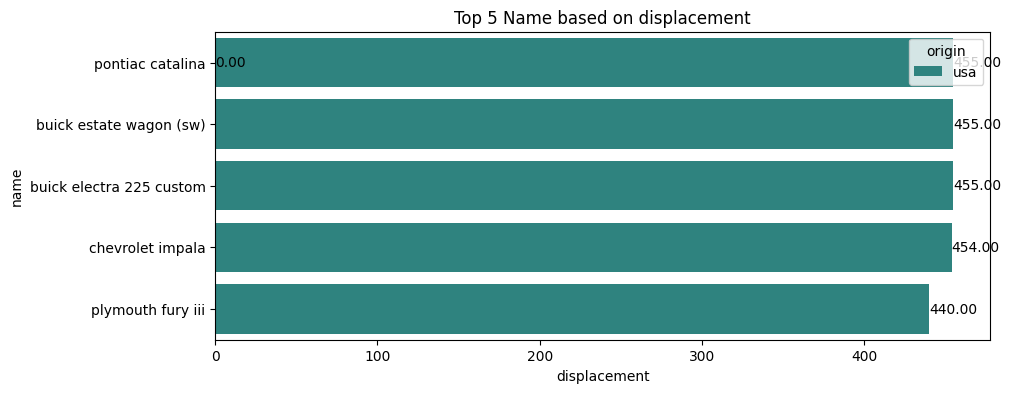

In [ ]:
# Displays the top 5 car names based on displacement
top5_acceleration = mpg.nlargest(5, 'displacement')

# Create a horizontal bar chart with Seaborn and add numbers
plt.figure(figsize=(10, 4))
ax = sns.barplot(x=top5_acceleration['displacement'], y=top5_acceleration['name'], hue=top5_acceleration['origin'], palette='viridis', orient='h')

# Add numbers to the diagram
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', (p.get_width(), p.get_y() + p.get_height()/2), ha='left', va='center')

plt.title("Top 5 Name based on displacement")
plt.show()

Conclusion :
1. The name of the Pontiac Catalina car has the highest displacement, Pontiac Grand Prix is ​​the name of the car with the highest horsepower and Pontiac Safari (SW) is the name of the car that has the highest weight. Of the three categories of variables with the highest value comes from USA origin
2. Meanwhile, the one with the highest MPG is the Mazda GLC from Japan and the car from the USA is not included in the top 5 cars with the highest MPG.